In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import meerkat as mk

In [4]:
df = mk.get("imagenette")

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid,label_id,label,label_idx,split,img_path,img_id,index,img
0,train/n02979186/n02979186_9036.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False,n02979186,cassette player,482,train,train/n02979186/n02979186_9036.JPEG,n02979186_9036,0,
1,train/n02979186/n02979186_11957.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False,n02979186,cassette player,482,train,train/n02979186/n02979186_11957.JPEG,n02979186_11957,1,
2,train/n02979186/n02979186_9715.JPEG,n02979186,n02979186,n02979186,n03417042,n03000684,False,n02979186,cassette player,482,train,train/n02979186/n02979186_9715.JPEG,n02979186_9715,2,
3,train/n02979186/n02979186_21736.JPEG,n02979186,n02979186,n02979186,n02979186,n03417042,False,n02979186,cassette player,482,train,train/n02979186/n02979186_21736.JPEG,n02979186_21736,3,
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,n02979186,n02979186,n02979186,n02979186,n03394916,False,n02979186,cassette player,482,train,train/n02979186/ILSVRC2012_val_00046953.JPEG,ILSVRC2012_val_00046953,4,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,train/n02979186/n02979186_734.JPEG,n02979186,n02979186,n02979186,n02979186,n02102040,False,n02979186,cassette player,482,train,train/n02979186/n02979186_734.JPEG,n02979186_734,95,
96,train/n02979186/n02979186_9863.JPEG,n02979186,n02979186,n02979186,n03888257,n02102040,False,n02979186,cassette player,482,train,train/n02979186/n02979186_9863.JPEG,n02979186_9863,96,
97,train/n02979186/n02979186_27494.JPEG,n02979186,n02979186,n02979186,n02979186,n03425413,False,n02979186,cassette player,482,train,train/n02979186/n02979186_27494.JPEG,n02979186_27494,97,
98,train/n02979186/n02979186_11839.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False,n02979186,cassette player,482,train,train/n02979186/n02979186_11839.JPEG,n02979186_11839,98,

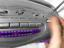
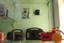
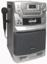
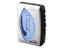
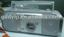
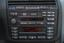
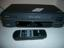
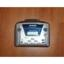
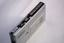
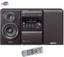

In [6]:
df[:100]

In [ ]:
mk.map()

In [3]:
df = mk.get("imagenette")

In [4]:
from PIL.Image import Image
import numpy as np

class ParachuteClassifier:
    
    def preprocess(self, img: Image) -> np.ndarray:
        """Prepare an image for classification."""
        return np.array(img.convert("RGB"))
    
    def predict(self, batch: np.ndarray) -> np.ndarray:
        """Classify a batch of images as containing a parachute or not."""
        print("here", batch.shape, batch.data)
        return batch[:, :, :, 2].mean(axis=1).mean(axis=1) > 0.5

classifier = ParachuteClassifier()

In [12]:
preprocessed[:4]().data

/Users/sabrieyuboglu/code/meerkat/meerkat/columns/tensor/numpy.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


array([array([[[176, 176, 176],
               [170, 170, 170],
               [178, 178, 178],
               ...,
               [227, 227, 227],
               [210, 210, 210],
               [164, 164, 164]],

              [[177, 177, 177],
               [177, 177, 177],
               [170, 170, 170],
               ...,
               [219, 219, 219],
               [166, 166, 166],
               [190, 190, 190]],

              [[180, 180, 180],
               [168, 168, 168],
               [183, 183, 183],
               ...,
               [162, 162, 162],
               [178, 178, 178],
               [ 96,  96,  96]],

              ...,

              [[115, 115, 115],
               [ 97,  97,  97],
               [107, 107, 107],
               ...,
               [147, 106,  84],
               [140, 103,  77],
               [132,  97,  69]],

              [[ 79,  79,  79],
               [ 82,  82,  82],
               [ 82,  82,  82],
               ...,
        

In [9]:
preprocessed = df["img"].defer(classifier.preprocess)
df["prediction"] = preprocessed.defer(
    classifier.predict, is_batched_fn=True, batch_size=32
)

here (1, 375, 500, 3) [[[[176 176 176]
   [170 170 170]
   [178 178 178]
   ...
   [227 227 227]
   [210 210 210]
   [164 164 164]]

  [[177 177 177]
   [177 177 177]
   [170 170 170]
   ...
   [219 219 219]
   [166 166 166]
   [190 190 190]]

  [[180 180 180]
   [168 168 168]
   [183 183 183]
   ...
   [162 162 162]
   [178 178 178]
   [ 96  96  96]]

  ...

  [[115 115 115]
   [ 97  97  97]
   [107 107 107]
   ...
   [147 106  84]
   [140 103  77]
   [132  97  69]]

  [[ 79  79  79]
   [ 82  82  82]
   [ 82  82  82]
   ...
   [141 104  78]
   [134  97  78]
   [129  93  77]]

  [[107 107 107]
   [102 102 102]
   [107 107 107]
   ...
   [137 102  74]
   [126  92  64]
   [124  93  64]]]]


In [6]:
from inspect import getfullargspec, signature
for name, param in signature(lambda a, b=1: x+y).parameters.items():
    print(param.default)

<class 'inspect._empty'>
1


In [13]:
df = mk.DataFrame({
    "birth_year": [1967, 1993, 2010, 1985, 2007, 1990, 1943],
    "residence": ["MA", "LA", "NY", "NY", "MA", "MA", "LA"]
})

In [25]:
import datetime
df["age"] = df["birth_year"].map(
    lambda x: datetime.datetime.now().year - x
)
def is_eligibile(age, residence):
    old_enough = age >= 18
    return {
        "ma_eligible": (residence == "MA") and old_enough,
        "la_eligible": (residence == "LA") and old_enough
    }

df.map(is_eligibile)

,ma_eligible,la_eligible
0,True,False
1,False,True
2,False,False
3,False,False
4,False,False
5,True,False
6,False,True


In [ ]:
mk.map()